In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.shape

(1984, 5)

In [5]:
df.drop(['Oil Investments', 'Gold Investments', 'Other sharesInvestments'], axis=1,inplace=True)

In [6]:
df.head()

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849


In [7]:
df.shape

(1984, 2)

In [8]:
df.dtypes

Date           object
Comp Stock    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1984 non-null   object 
 1   Comp Stock  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [10]:
df.describe()

,Comp Stock
count,1984.000000
mean,0.001007
std,0.016017
min,-0.123558
25%,-0.006926
50%,0.000876
75%,0.009708
max,0.088741


In [11]:
df.isnull().sum()

Date          0
Comp Stock    0
dtype: int64

In [12]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [13]:
df.dtypes

Date          datetime64[ns]
Comp Stock           float64
dtype: object

In [14]:
df.set_index('Date',inplace=True)

In [15]:
df.head()

,Comp Stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849


In [16]:
df.tail()

,Comp Stock
Date,
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008
2017-11-14,-0.015118
2017-11-15,-0.013190


In [17]:
import numpy as np 
train_set, test_set= np.split(df, [int(.75 *len(df))])

In [18]:
print(train_set, test_set)

            Comp Stock
Date                  
2009-12-31    0.017354
2010-04-01    0.015565
2010-05-01    0.001729
2010-06-01   -0.015906
2010-07-01   -0.001849
...                ...
2015-11-20    0.004378
2015-11-23   -0.012992
2015-11-24    0.009597
2015-11-25   -0.007150
2015-11-27   -0.001864

[1488 rows x 1 columns]             Comp Stock
Date                  
2015-11-30    0.004159
2015-01-12   -0.008115
2015-02-12   -0.009034
2015-03-12   -0.009288
2015-04-12    0.033247
...                ...
2017-09-11   -0.002043
2017-10-11   -0.006880
2017-11-13   -0.004008
2017-11-14   -0.015118
2017-11-15   -0.013190

[496 rows x 1 columns]


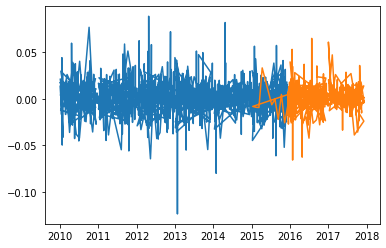

In [19]:
train = df[:1488]
test = df[-496:]
plt.plot(train)
plt.plot(test)

In [20]:
#Check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

In [21]:
result=adfuller(df['Comp Stock'])

In [22]:
print("The values given as output by adfuller is : \n 'ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used")

The values given as output by adfuller is : 
 'ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used


In [23]:
 #perform dickey fuller test  
def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Comp Stock'],autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)

Results of dickey fuller test
Test Statistics               -1.247339e+01
p-value                        3.207774e-23
No. of lags used               1.200000e+01
Number of observations used    1.971000e+03
critical value (1%)           -3.433672e+00
critical value (5%)           -2.863008e+00
critical value (10%)          -2.567551e+00
dtype: float64


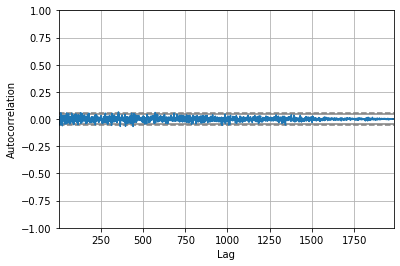

In [24]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(df['Comp Stock'])
plt.show()

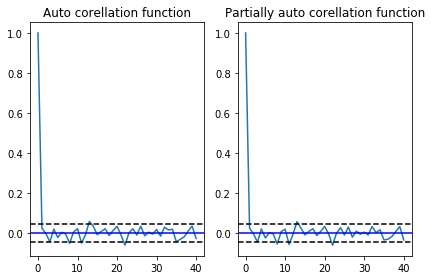

In [25]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df, nlags=40)
pacf= pacf(df, nlags=40,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

In [26]:
import statsmodels.api as sm

In [27]:
model = sm.tsa.statespace.SARIMAX(train,order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Comp Stock   No. Observations:                 1488
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                3897.196
Date:                            Sat, 31 Oct 2020   AIC                          -7784.392
Time:                                    11:58:17   BIC                          -7757.910
Sample:                                         0   HQIC                         -7774.518
                                           - 1488                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0205      0.022      0.914      0.361      -0.023       0.064
ma.L1         -0.9992      0.015    -65.500      0.000      -1.029      -0.969
ar.S.L12       0.0002      0.029      0.008      0.993      -0.057       0.057
ma.S.L12      -0.9999      1.149     -0.870      0.384      -3.253       1.253
sigma2         0.0003      0.000      0.872      0.383      -0.000       0.001
===================================================================================
Ljung-Box (Q):                       58.95   Jarque-Bera (JB):               942.70
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.11
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

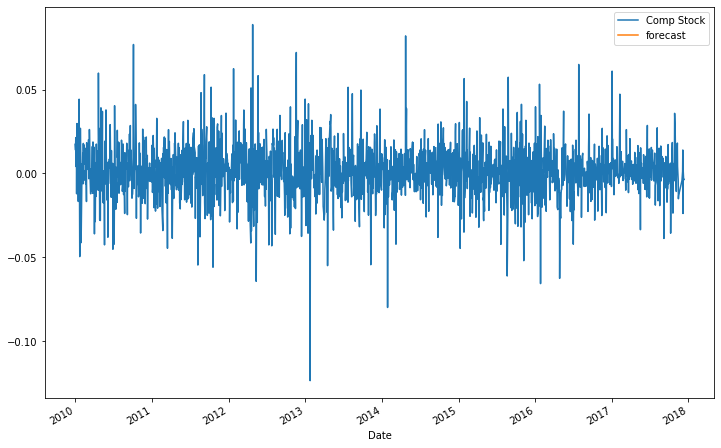

In [29]:
df['forecast']=model_fit.predict(start=2015-11-30,end=2017-11-15,dynamic = True)
df[['Comp Stock','forecast']].plot(figsize=(12,8))

In [30]:
from pandas.tseries.offsets import DateOffset
future_dates= [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [31]:
future_datest_df= pd.DataFrame(index = future_dates [1:], columns=df.columns)

In [32]:
future_datest_df.tail()

,Comp Stock,forecast
2019-06-15,NaN,NaN
2019-07-15,NaN,NaN
2019-08-15,NaN,NaN
2019-09-15,NaN,NaN
2019-10-15,NaN,NaN
